In [1]:
#: Loading H2O Library

In [2]:
import h2o

In [3]:
#: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
#: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,8 hours 11 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_avkashchauhan_1ocjkz
H2O cluster total nodes:,1
H2O cluster free memory:,3.275 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
#: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_train.csv")
#test_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_test.csv")

train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
#: Understanding Training dataset

In [10]:
train_df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
#: Understanding Test dataset

In [12]:
test_df.describe()

Rows:99
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.74,0.0,0.389,3.561,9.9,1.1781,1.0,187.0,12.6,6.68,2.88,5.6
mean,3.80327535354,14.5555555556,10.0165656566,0.0707070707071,0.54618989899,6.27662626263,65.2282828283,4.11312828283,8.36363636364,391.212121212,18.4888888889,366.00959596,12.0817171717,22.1545454545
maxs,88.9762,95.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,34.41,50.0
sigma,10.9318629744,27.154498339,6.96902859181,0.257639411539,0.11739221152,0.752520981955,29.378799938,2.42831711324,8.3206830389,160.149373687,2.18869492793,78.0843033028,7.32150592857,9.28388193709
zeros,0,71,0,92,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.9,18.72,15.2


In [13]:
#: Training and test dataset - columns and rows details

In [14]:
print(train_df.shape)
print(test_df.shape)

(407, 14)
(99, 14)


In [15]:
#: Training and Test Dataframes - columns names

In [16]:
print(train_df.col_names)
print(test_df.col_names)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [17]:
#: Training and Test Dataframes - columns names

In [18]:
print(train_df.columns)
print(test_df.columns)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [19]:
#: Training and Test dataframes - columns by their type i.e. numeric, string, categorical(enum)

In [20]:
print(train_df.columns_by_type())
print(test_df.columns_by_type())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


In [21]:
#: Training and Test dataframes - columns type as strings

In [22]:
print(train_df.columns_by_type("string"))
print(test_df.columns_by_type("string"))

[]
[]


In [23]:
#: Training and Test dataframes - columns type as numeric

In [24]:
print(train_df.columns_by_type("numeric"))
print(test_df.columns_by_type("numeric"))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


In [25]:
#: Training and Test dataframes - columns type as categorical or enum

In [26]:
print(train_df.columns_by_type("categorical"))
print(test_df.columns_by_type("categorical"))

[]
[]


In [27]:
#: Settings response or target variable for supervised machine learning

In [28]:
response = "medv"
features = train_df.col_names
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [29]:
#: Creating a list of all features we will use for machine learning

In [30]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [31]:
#: Understanding response variable values as historgram in Training data

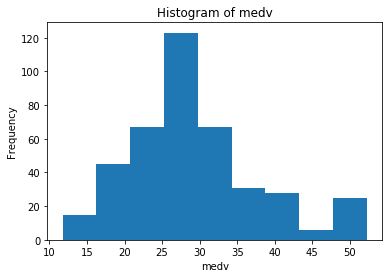

In [32]:
train_df['medv'].hist()

In [33]:
#: Understanding response variable values as historgram in Test data

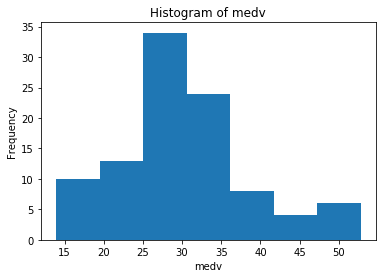

In [34]:
test_df['medv'].hist()

In [35]:
#: Understanding response variable values 

In [36]:
train_df['medv'].levels()

[]

In [37]:
#: Understanding response column as dataframe

In [38]:
type(train_df['medv'])

h2o.frame.H2OFrame

In [39]:
#: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [41]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [45]:
#: Building Gradient Boosting (GBM) - Regression model only with training dataframe

In [43]:
gbm_model_with_training_only = H2OGradientBoostingEstimator()
gbm_model_with_training_only.train(x= features, y = response, training_frame= train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [44]:
gbm_model_with_training_only

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1510608322538_108


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.43245942278
RMSE: 1.55963438753
MAE: 1.14724929561
RMSLE: 0.0729168703898
Mean Residual Deviance: 2.43245942278
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-11-13 21:37:15,0.007 sec,0.0,9.1737286,6.6624344,84.1572961
,2017-11-13 21:37:15,0.103 sec,1.0,8.3616677,6.0641476,69.9174865
,2017-11-13 21:37:15,0.122 sec,2.0,7.6387843,5.5427168,58.3510263
,2017-11-13 21:37:15,0.131 sec,3.0,6.9973531,5.0740232,48.9629497
,2017-11-13 21:37:15,0.139 sec,4.0,6.4257623,4.6618307,41.2904211
---,---,---,---,---,---,---
,2017-11-13 21:37:15,0.382 sec,46.0,1.6384591,1.2007742,2.6845481
,2017-11-13 21:37:15,0.387 sec,47.0,1.6120397,1.1841363,2.5986719
,2017-11-13 21:37:15,0.392 sec,48.0,1.5931563,1.1706599,2.5381470
,2017-11-13 21:37:15,0.397 sec,49.0,1.5725820,1.1565654,2.4730140



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lstat,105866.8125000,1.0,0.6047349
rm,39758.8984375,0.3755558,0.2271117
dis,11466.9921875,0.1083153,0.0655020
nox,6184.4399414,0.0584172,0.0353269
crim,3648.9958496,0.0344678,0.0208439
ptratio,2454.0090332,0.0231802,0.0140178
tax,2219.0605469,0.0209609,0.0126758
age,1424.7196045,0.0134577,0.0081383
b,1419.9967041,0.0134130,0.0081113
indus,331.3314514,0.0031297,0.0018926


In [46]:
#:Building Gradient Boosting (GBM) -  Regression model with cross validation

In [47]:
gbm_model_with_training_and_cv = H2OGradientBoostingEstimator(nfolds=5)
gbm_model_with_training_and_cv.train(x = features, y = response, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [48]:
gbm_model_with_training_and_cv

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1510608322538_109


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.43245942278
RMSE: 1.55963438753
MAE: 1.14724929561
RMSLE: 0.0729168703898
Mean Residual Deviance: 2.43245942278

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 13.1576416685
RMSE: 3.62734636733
MAE: 2.32606559808
RMSLE: 0.151485625426
Mean Residual Deviance: 13.1576416685
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.3286123,0.1878655,1.9392658,2.2965672,2.216043,2.7457395,2.4454458
mean_residual_deviance,13.04055,5.228491,6.686803,9.377713,10.016728,27.479563,11.641943
mse,13.04055,5.228491,6.686803,9.377713,10.016728,27.479563,11.641943
r2,0.8497763,0.0387310,0.8601611,0.9067502,0.8836416,0.7473133,0.8510155
residual_deviance,13.04055,5.228491,6.686803,9.377713,10.016728,27.479563,11.641943
rmse,3.4934473,0.6466746,2.5858853,3.0623052,3.1649215,5.2420955,3.4120293
rmsle,0.1511169,0.0142300,0.1353346,0.1726253,0.1374982,0.1784795,0.1316472


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-11-13 21:38:27,0.378 sec,0.0,9.1737286,6.6624344,84.1572961
,2017-11-13 21:38:27,0.382 sec,1.0,8.3616677,6.0641476,69.9174865
,2017-11-13 21:38:27,0.385 sec,2.0,7.6387843,5.5427168,58.3510263
,2017-11-13 21:38:27,0.387 sec,3.0,6.9973531,5.0740232,48.9629497
,2017-11-13 21:38:27,0.389 sec,4.0,6.4257623,4.6618307,41.2904211
---,---,---,---,---,---,---
,2017-11-13 21:38:27,0.488 sec,46.0,1.6384591,1.2007742,2.6845481
,2017-11-13 21:38:27,0.490 sec,47.0,1.6120397,1.1841363,2.5986719
,2017-11-13 21:38:27,0.492 sec,48.0,1.5931563,1.1706599,2.5381470
,2017-11-13 21:38:27,0.494 sec,49.0,1.5725820,1.1565654,2.4730140



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lstat,105866.8125000,1.0,0.6047349
rm,39758.8984375,0.3755558,0.2271117
dis,11466.9921875,0.1083153,0.0655020
nox,6184.4399414,0.0584172,0.0353269
crim,3648.9958496,0.0344678,0.0208439
ptratio,2454.0090332,0.0231802,0.0140178
tax,2219.0605469,0.0209609,0.0126758
age,1424.7196045,0.0134577,0.0081383
b,1419.9967041,0.0134130,0.0081113
indus,331.3314514,0.0031297,0.0018926


In [49]:
#: Building Gradient Boosting (GBM) -  Regression model with training and 
#  validation data and for that reason we need to split training dataset

In [50]:
df_house_train, df_house_valid = train_df.split_frame(ratios=[0.9])

In [51]:
#: understanding the row count into original andsplit object

In [52]:
print(train_df.shape)
print(df_house_train.shape)
print(df_house_valid.shape)

(407, 14)
(368, 14)
(39, 14)


In [53]:
#:Building Gradient Boosting (GBM) -  Regression model with training and validation data now

In [93]:
gbm_model_with_training_and_validtion = H2OGradientBoostingEstimator()
gbm_model_with_training_and_validtion.train(x = features, y = response, 
                                            training_frame=df_house_train, 
                                            validation_frame=df_house_valid,
                                           model_id = "glm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [94]:
gbm_model_with_training_and_validtion

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  glm_model_with_training_and_validtion_python


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.88056026286
RMSE: 1.69722133585
MAE: 1.21605675894
RMSLE: 0.0774234020717
Mean Residual Deviance: 2.88056026286

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 6.68923704087
RMSE: 2.58635593855
MAE: 2.02121580951
RMSLE: 0.142586248492
Mean Residual Deviance: 6.68923704087
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-11-13 21:46:09,0.001 sec,0.0,9.0214236,6.5323163,81.3860844,10.5053617,8.0354377,110.3626254
,2017-11-13 21:46:09,0.004 sec,1.0,8.2378724,5.9683502,67.8625417,9.6466729,7.3452957,93.0582979
,2017-11-13 21:46:09,0.006 sec,2.0,7.5487244,5.4743254,56.9832393,8.8693574,6.6978579,78.6655001
,2017-11-13 21:46:09,0.009 sec,3.0,6.9301201,5.0208529,48.0265644,8.1983883,6.1176649,67.2135715
,2017-11-13 21:46:09,0.011 sec,4.0,6.3664987,4.6170981,40.5323055,7.5714339,5.6292806,57.3266111
---,---,---,---,---,---,---,---,---,---
,2017-11-13 21:46:09,0.097 sec,46.0,1.7494733,1.2532421,3.0606567,2.6069146,2.0387504,6.7960039
,2017-11-13 21:46:09,0.101 sec,47.0,1.7345561,1.2416255,3.0086847,2.6110173,2.0321656,6.8174114
,2017-11-13 21:46:09,0.103 sec,48.0,1.7240909,1.2345456,2.9724895,2.6068574,2.0287245,6.7957053
,2017-11-13 21:46:09,0.105 sec,49.0,1.7107562,1.2261311,2.9266868,2.5965716,2.0209033,6.7421841



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lstat,78612.9609375,1.0,0.5170109
rm,48477.125,0.6166556,0.3188177
nox,6748.4257812,0.0858437,0.0443821
dis,6396.3041992,0.0813645,0.0420663
crim,3415.4191894,0.0434460,0.0224621
age,2679.9108887,0.0340899,0.0176249
ptratio,2339.2175293,0.0297561,0.0153842
tax,1475.7596435,0.0187725,0.0097056
b,1166.6232910,0.0148401,0.0076725
indus,344.2544250,0.0043791,0.0022640


In [59]:
#:Building Gradient Boosting (GBM) -  Regression model with training and validation data now
#  Setting key GBM parameters

In [71]:
gbm_model_with_training_cv_config = H2OGradientBoostingEstimator(distribution="AUTO",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.2,
                                      nfolds=5,
                                      keep_cross_validation_predictions=True,
                                      seed=1)

In [72]:
gbm_model_with_training_cv_config.train(x = features, y = response, 
                                            training_frame=df_house_train, 
                                           model_id = "glm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [73]:
gbm_model_with_training_cv_config

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  glm_model_with_training_and_validtion_python


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 7.11171181706
RMSE: 2.66677929665
MAE: 2.07674210616
RMSLE: 0.138489775617
Mean Residual Deviance: 7.11171181706

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 13.9557638372
RMSE: 3.73574140396
MAE: 2.66556713199
RMSLE: 0.173420469639
Mean Residual Deviance: 13.9557638372
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.6803577,0.2138530,2.5204084,2.3174818,2.492029,2.9593496,3.1125195
mean_residual_deviance,14.094207,2.9515212,14.148179,9.05112,10.369685,16.23254,20.66951
mse,14.094207,2.9515212,14.148179,9.05112,10.369685,16.23254,20.66951
r2,0.8136706,0.0521258,0.8218292,0.8353588,0.8956386,0.8404192,0.6751072
residual_deviance,14.094207,2.9515212,14.148179,9.05112,10.369685,16.23254,20.66951
rmse,3.71309,0.3918990,3.7614067,3.008508,3.2201996,4.0289626,4.5463734
rmsle,0.1703835,0.0252869,0.1644431,0.1229773,0.1602757,0.1705176,0.2337037


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-11-13 21:44:32,0.123 sec,0.0,9.0214236,6.5323163,81.3860844
,2017-11-13 21:44:32,0.126 sec,1.0,7.5807724,5.5345748,57.4681096
,2017-11-13 21:44:32,0.127 sec,2.0,6.3862971,4.7285212,40.7847912
,2017-11-13 21:44:32,0.129 sec,3.0,5.4506999,4.0695520,29.7101298
,2017-11-13 21:44:32,0.131 sec,4.0,4.7023458,3.5160174,22.1120558
,2017-11-13 21:44:32,0.133 sec,5.0,4.1558427,3.1337179,17.2710283
,2017-11-13 21:44:32,0.134 sec,6.0,3.7119798,2.8099987,13.7787943
,2017-11-13 21:44:32,0.135 sec,7.0,3.3535796,2.5676793,11.2464962
,2017-11-13 21:44:32,0.137 sec,8.0,3.0747721,2.3641834,9.4542234
,2017-11-13 21:44:32,0.138 sec,9.0,2.8439842,2.2179213,8.0882460


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
rm,36017.3164062,1.0,0.4743808
lstat,28022.1464844,0.7780187,0.3690771
dis,5598.6972656,0.1554446,0.0737399
nox,2135.4477539,0.0592895,0.0281258
ptratio,2087.7563477,0.0579653,0.0274976
crim,1626.9602051,0.0451716,0.0214285
tax,359.4153137,0.0099790,0.0047338
rad,39.9138908,0.0011082,0.0005257
age,37.2540436,0.0010343,0.0004907
zn,0.0,0.0,0.0


In [ ]:
#: Performing predictions with one of the above model

In [74]:
gbm_predictions = gbm_model_with_training_cv_config.predict(test_df)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [75]:
gbm_predictions

predict
26.1239
24.3819
17.8637
16.9427
16.9427
17.8637
23.083
20.9039
28.8818
21.236


In [78]:
#: Understanding/Validating predictions based on prediction results historgram

In [80]:
type(gbm_predictions)

h2o.frame.H2OFrame

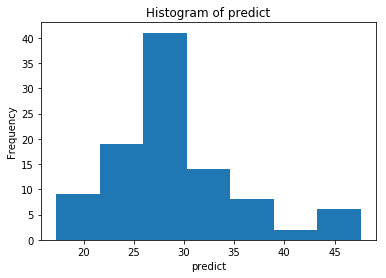

In [81]:
gbm_predictions.hist()

In [82]:
#: Understanding/Validating predictions based on prediction results historgram

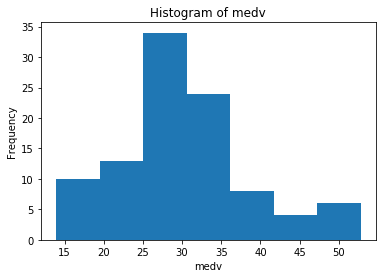

In [83]:
test_df['medv'].hist()

In [84]:
#: Here we can select the best model based on accuracy among all of above models we have created

In [85]:
gbm_model_with_training_and_cv.model_performance(train=True)


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.43245942278
RMSE: 1.55963438753
MAE: 1.14724929561
RMSLE: 0.0729168703898
Mean Residual Deviance: 2.43245942278


In [86]:
#: Here we can select the best model based on accuracy among all of above models we have created 
#: R^2 Error

In [87]:
gbm_model_with_training_and_cv.model_performance(train=True).r2()

0.9710962740412776

In [88]:
#: RMSE (Root Mean Square) Error

In [90]:
print(gbm_model_with_training_and_cv.model_performance(train=True).rmse())
print(gbm_model_with_training_and_cv.model_performance(xval=True).rmse())

1.55963438753
3.62734636733


In [101]:
#: R^2 (R^2) Error

In [102]:
print(gbm_model_with_training_and_validtion.model_performance(train=True).r2())
print(gbm_model_with_training_and_validtion.model_performance(valid=True).r2())

0.964606231079
0.939063232834


In [103]:
#: Getting model ID from an H2O Model

In [104]:
print(gbm_model_with_training_and_cv.model_id)
print(gbm_model_with_training_and_validtion.model_id)

GBM_model_python_1510608322538_109
glm_model_with_training_and_validtion_python


In [105]:
#: Because we have built the GBM model, getting coefficients from the model will give error

In [119]:
## coefficients >>> GBM model does not have coefficients to display
gbm_model_with_training_and_validtion.coef()

KeyError: u'coefficients_table'

In [114]:
#: Because we have built the GBM model, getting coefficients from the model will give error

In [121]:
gbm_model_with_training_and_cv.coef_norm() ## >>> GBM models does not have coeffiecients

KeyError: u'coefficients_table'

In [122]:
#: Getting Scorring History

In [118]:
gbm_model_with_training_and_cv.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2017-11-13 21:38:27,0.378 sec,0.0,9.173729,6.662434,84.157296
1,,2017-11-13 21:38:27,0.382 sec,1.0,8.361668,6.064148,69.917487
2,,2017-11-13 21:38:27,0.385 sec,2.0,7.638784,5.542717,58.351026
3,,2017-11-13 21:38:27,0.387 sec,3.0,6.997353,5.074023,48.962950
4,,2017-11-13 21:38:27,0.389 sec,4.0,6.425762,4.661831,41.290421
5,,2017-11-13 21:38:27,0.392 sec,5.0,5.921118,4.299241,35.059635
6,,2017-11-13 21:38:27,0.394 sec,6.0,5.471653,3.970074,29.938982
7,,2017-11-13 21:38:27,0.396 sec,7.0,5.076344,3.685588,25.769265
8,,2017-11-13 21:38:27,0.399 sec,8.0,4.718492,3.432053,22.264165
9,,2017-11-13 21:38:27,0.401 sec,9.0,4.398797,3.198106,19.349414


In [ ]:
#: Getting GBM model variable importance 

In [123]:
gbm_model_with_training_and_cv.varimp()

[(u'lstat', 105866.8125, 1.0, 0.6047348824410893),
 (u'rm', 39758.8984375, 0.37555582810713223, 0.22711170956043256),
 (u'dis', 11466.9921875, 0.108315268181896, 0.06550202097055394),
 (u'nox', 6184.43994140625, 0.05841717338383311, 0.035326902478813045),
 (u'crim', 3648.995849609375, 0.03446779744699856, 0.02084387943711395),
 (u'ptratio', 2454.009033203125, 0.023180154150793244, 0.014017847795346278),
 (u'tax', 2219.060546875, 0.020960870498249864, 0.012675769556622028),
 (u'age', 1424.7196044921875, 0.013457660345560962, 0.008138316647004916),
 (u'b', 1419.9967041015625, 0.013413048627506023, 0.008111338384931468),
 (u'indus', 331.3314514160156, 0.0031297008343952513, 0.0018926392661637913),
 (u'rad', 159.52056884765625, 0.0015068043051514018, 0.0009112171243374602),
 (u'zn', 107.55658721923828, 0.0010159613261166078, 0.00061438725311382),
 (u'chas', 20.848114013671875, 0.0001969277578246901, 0.00011908908447750126)]

In [125]:
#: Getting GBM model variable importance PLOT

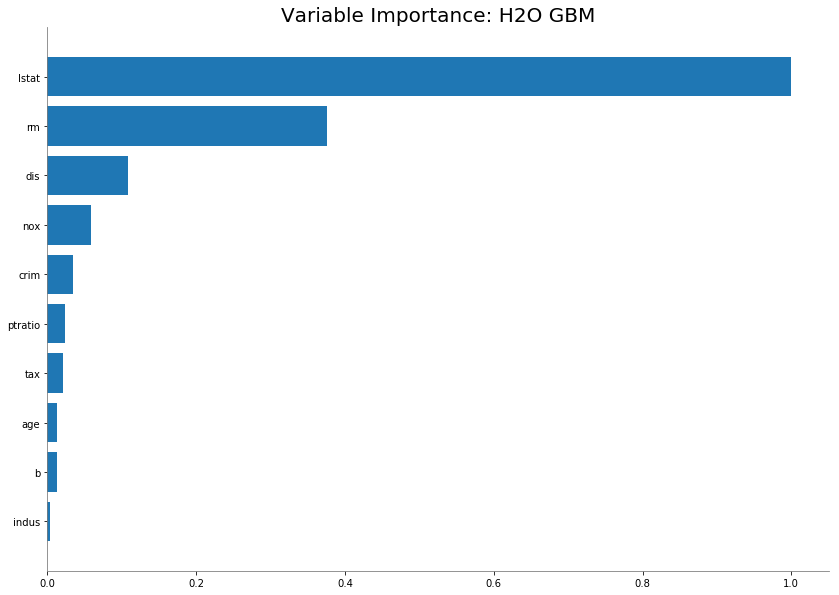

In [126]:
gbm_model_with_training_and_cv.varimp_plot()

In [127]:
#: Getting cross validation prediction details from the model with cross-validation 
#: (If cross validation prediction save is not set to TRUE, you will get error message)

In [128]:
gbm_model_with_training_and_cv.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.3286123,0.1878655,1.9392658,2.2965672,2.216043,2.7457395,2.4454458
mean_residual_deviance,13.04055,5.228491,6.686803,9.377713,10.016728,27.479563,11.641943
mse,13.04055,5.228491,6.686803,9.377713,10.016728,27.479563,11.641943
r2,0.8497763,0.0387310,0.8601611,0.9067502,0.8836416,0.7473133,0.8510155
residual_deviance,13.04055,5.228491,6.686803,9.377713,10.016728,27.479563,11.641943
rmse,3.4934473,0.6466746,2.5858853,3.0623052,3.1649215,5.2420955,3.4120293
rmsle,0.1511169,0.0142300,0.1353346,0.1726253,0.1374982,0.1784795,0.1316472


In [129]:
#: Getting variable importance from a GBM mode (It will plot the coefficient table)

In [131]:
gbm_model_with_training_and_validtion.varimp()

[(u'lstat', 78612.9609375, 1.0, 0.5170108598541927),
 (u'rm', 48477.125, 0.6166556305968551, 0.3188176578088095),
 (u'nox', 6748.42578125, 0.08584367896554908, 0.04438211427502581),
 (u'dis', 6396.30419921875, 0.08136449922429498, 0.04206632970555854),
 (u'crim', 3415.419189453125, 0.04344600621478309, 0.022462057030335606),
 (u'age', 2679.910888671875, 0.03408993703725898, 0.01762486766000856),
 (u'ptratio', 2339.217529296875, 0.029756130559140663, 0.015384242646314935),
 (u'tax', 1475.7596435546875, 0.01877247245181322, 0.009705572123901099),
 (u'b', 1166.623291015625, 0.014840088416757772, 0.007672486872660182),
 (u'indus', 344.2544250488281, 0.00437910518753418, 0.0022640449383990024),
 (u'rad', 333.5917663574219, 0.004243470318115085, 0.002193920237934425),
 (u'zn', 48.1435661315918, 0.000612412578758706, 0.0003166239539295621),
 (u'chas', 15.08712100982666, 0.0001919164579212509, 9.922289293003694e-05)]

In [ ]:
#: Getting variable importance PLOT for GLM (Error)

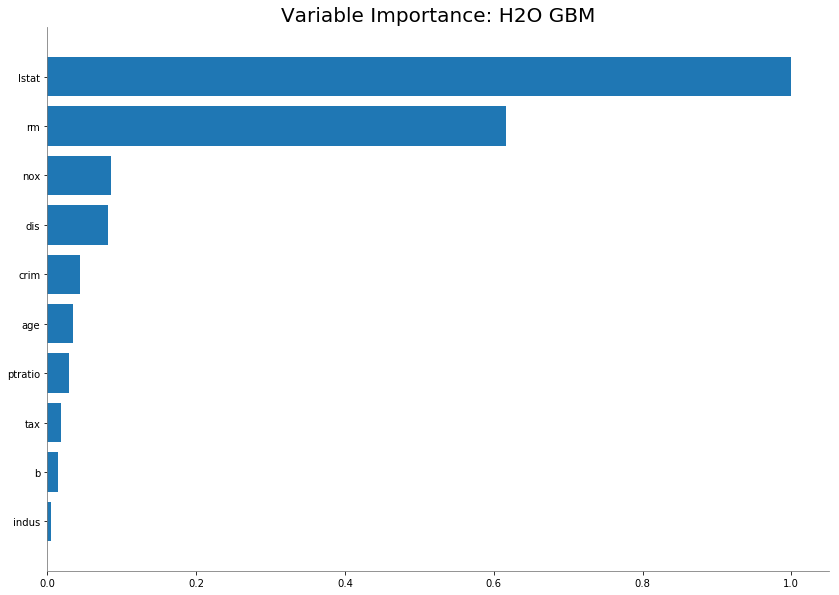

In [134]:
# - Positive ?
# - Negative ?
gbm_model_with_training_and_validtion.varimp_plot()

In [135]:
#: Building a GBM model with cross validation and saving cross validation predictions

In [136]:
gbm_model_with_training_and_cv = H2OGradientBoostingEstimator(keep_cross_validation_predictions = True, nfolds=5)
gbm_model_with_training_and_cv.train(x = features, y = response, training_frame= train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [137]:
#: Looking at cross validation predictions for all CV models

In [138]:
len(gbm_model_with_training_and_cv.cross_validation_predictions())

5

In [139]:
gbm_model_with_training_and_cv.cross_validation_predictions()[0]
gbm_model_with_training_and_cv.cross_validation_predictions()[1]

predict
0
0
0
0
0
0
0
0
0
18.836


In [141]:
#: Accessing H2O Model details from JSON

In [140]:
gbm_model_with_training_and_validtion._model_json

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,11471.0,5.0,5.0,5.0,7.0,21.0,13.36


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-11-13 21:46:09,0.001 sec,0.0,9.0214236,6.5323163,81.3860844,10.5053617,8.0354377,110.3626254
,2017-11-13 21:46:09,0.004 sec,1.0,8.2378724,5.9683502,67.8625417,9.6466729,7.3452957,93.0582979
,2017-11-13 21:46:09,0.006 sec,2.0,7.5487244,5.4743254,56.9832393,8.8693574,6.6978579,78.6655001
,2017-11-13 21:46:09,0.009 sec,3.0,6.9301201,5.0208529,48.0265644,8.1983883,6.1176649,67.2135715
,2017-11-13 21:46:09,0.011 sec,4.0,6.3664987,4.6170981,40.5323055,7.5714339,5.6292806,57.3266111
---,---,---,---,---,---,---,---,---,---
,2017-11-13 21:46:09,0.097 sec,46.0,1.7494733,1.2532421,3.0606567,2.6069146,2.0387504,6.7960039
,2017-11-13 21:46:09,0.101 sec,47.0,1.7345561,1.2416255,3.0086847,2.6110173,2.0321656,6.8174114
,2017-11-13 21:46:09,0.103 sec,48.0,1.7240909,1.2345456,2.9724895,2.6068574,2.0287245,6.7957053
,2017-11-13 21:46:09,0.105 sec,49.0,1.7107562,1.2261311,2.9266868,2.5965716,2.0209033,6.7421841



See the whole table with table.as_data_frame()

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.88056026286
RMSE: 1.69722133585
MAE: 1.21605675894
RMSLE: 0.0774234020717
Mean Residual Deviance: 2.88056026286

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 6.68923704087
RMSE: 2.58635593855
MAE: 2.02121580951
RMSLE: 0.142586248492
Mean Residual Deviance: 6.68923704087
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
lstat,78612.9609375,1.0,0.5170109
rm,48477.125,0.6166556,0.3188177
nox,6748.4257812,0.0858437,0.0443821
dis,6396.3041992,0.0813645,0.0420663
crim,3415.4191894,0.0434460,0.0224621
age,2679.9108887,0.0340899,0.0176249
ptratio,2339.2175293,0.0297561,0.0153842
tax,1475.7596435,0.0187725,0.0097056
b,1166.6232910,0.0148401,0.0076725
indus,344.2544250,0.0043791,0.0022640


{u'__meta': {u'schema_name': u'GBMModelV3',
  u'schema_type': u'GBMModel',
  u'schema_version': 3},
 u'algo': u'gbm',
 u'algo_full_name': u'Gradient Boosting Machine',
 u'compatible_frames': None,
 u'data_frame': {u'URL': u'/3/Frames/py_17_sid_9c9b',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'py_17_sid_9c9b',
  u'type': u'Key<Frame>'},
 u'model_id': {u'URL': u'/3/Models/glm_model_with_training_and_validtion_python',
  u'__meta': {u'schema_name': u'ModelKeyV3',
   u'schema_type': u'Key<Model>',
   u'schema_version': 3},
  u'name': u'glm_model_with_training_and_validtion_python',
  u'type': u'Key<Model>'},
 u'output': {u'__meta': {u'schema_name': u'GBMModelOutputV3',
   u'schema_type': u'GBMOutput',
   u'schema_version': 3},
  u'cross_validation_fold_assignment_frame_id': None,
  u'cross_validation_holdout_predictions_frame_id': None,
  u'cross_validation_metrics': None,
  u'cross_validation_metrics_summary': None

In [144]:
gbm_model_with_training_and_validtion._model_json['output']['coefficients_table']
## GBM model does not have coefficients table

KeyError: 'coefficients_table'

In [145]:
gbm_model_with_training_and_validtion._model_json['output']['names']

[u'crim',
 u'zn',
 u'indus',
 u'chas',
 u'nox',
 u'rm',
 u'age',
 u'dis',
 u'rad',
 u'tax',
 u'ptratio',
 u'b',
 u'lstat',
 u'medv']

In [146]:
gbm_model_with_training_and_validtion._model_json['output']['cross_validation_predictions']

In [147]:
gbm_model_with_training_and_cv._model_json['output']['cross_validation_predictions']

[{u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_110_cv_1',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GBM_model_python_1510608322538_110_cv_1',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_110_cv_2',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GBM_model_python_1510608322538_110_cv_2',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_110_cv_3',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GBM_model_python_1510608322538_110_cv_3',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_110_cv_4',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
 

In [148]:
gbm_model_with_training_and_cv._model_json['output']['training_metrics']


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.43245942278
RMSE: 1.55963438753
MAE: 1.14724929561
RMSLE: 0.0729168703898
Mean Residual Deviance: 2.43245942278


In [149]:
gbm_model_with_training_and_cv._model_json['output']['training_metrics']['MSE']

2.432459422775773

In [150]:
gbm_model_with_training_and_cv._model_json['output']['training_metrics']['R^2']